# Bootstrap

<font color='green'> *Introduction to Statistical Learning with Application in R - 5.2 Bootstrap bölümünü anlatmak için hazırladım ve 23.12.2021 tarihinde Skylab AI Research Lab toplantısında anlattım.* 
    
Elif Kurt
</font>

### İçindekiler

**1. Population parameters & Estimated Population parameters**

**2. Tek bir sample'dan population parametre değerlerini tahmin etmek**
* Boyu 100 ile 240 cm arasında değişen 500.000 kişinin boy uzunluklarını simule edelim.  
* Populasyondan random sample alalım.

**3. Bootstrap**

3.1 Bootstrap Nedir?
* Replacement

* Resampling

* Gaussian Dağılımı - Merkezi Limit Teoremi
 
3.2 Bootstrap Nasıl Uygulanır?

**4. Scikit-learn'de Bootstrap**

### Kaynaklar

- [towardsdatascience - A Practical Guide to Bootstrap in R](https://towardsdatascience.com/a-practical-guide-to-bootstrap-with-r-examples-bd975ec6dcea)
- [towardsdatascience - What is Bootstrap Sampling in Machine Learning and Why is it Important?](https://towardsdatascience.com/what-is-bootstrap-sampling-in-machine-learning-and-why-is-it-important-a5bb90cbd89a)
- [ethanwicker.com - Bootstrap Resampling](https://ethanwicker.com/2021-02-23-bootstrap-resampling-001/)
- [towardsdatascience - Bootstrap and Statistical Inference in Python](https://towardsdatascience.com/bootstrap-and-statistical-inference-in-python-a06d098a8bfd)
- [Github - Bootstrap_in_Python](https://github.com/LeihuaYe/Bootstrap_in_Python/blob/main/Bootstrap%20in%20Python%20(Github).ipynb)

## 1.) Population parameters & Estimated Population parameters

<font color="blue">Yeşil yuvarlaklar X geninde bulunan her bir hücreyi ifade ediyor. Üzerinde yer alan histogram hücrelerde bulunan mRNA sayısına göre şekil almış. Burada X geninde 240 milyar hücrede bulunan mRNA sayısını bildiğimizi varsayıp dağılım grafiğini çizdik. Burada hesapladığımız ortalama ve standart sapmayı populationa ait ölçümler olarak tanımlıyoruz: **population mean** ve **population standard deviation** olarak isimlendiriyoruz.  </font>

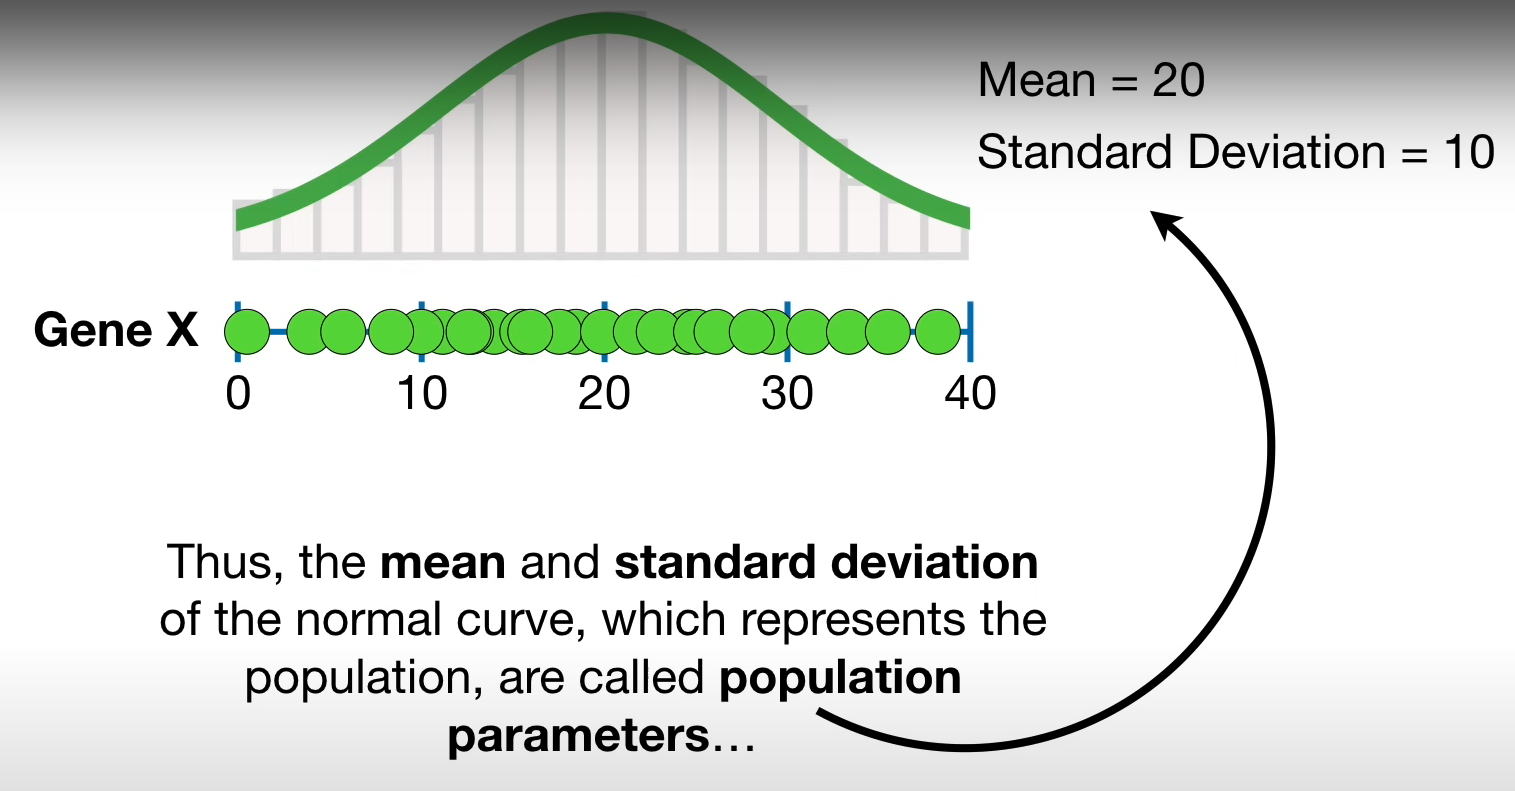

<font color="blue">Fakat bizim elimizde hiçbir zaman 240 milyar hücrenin mRNA sayısı bilgisi olmaz.</font>

<font color="blue">**Diyelim ki elimizde 2 hücreye ait mRNA sayısı bilgisi var.**</font>

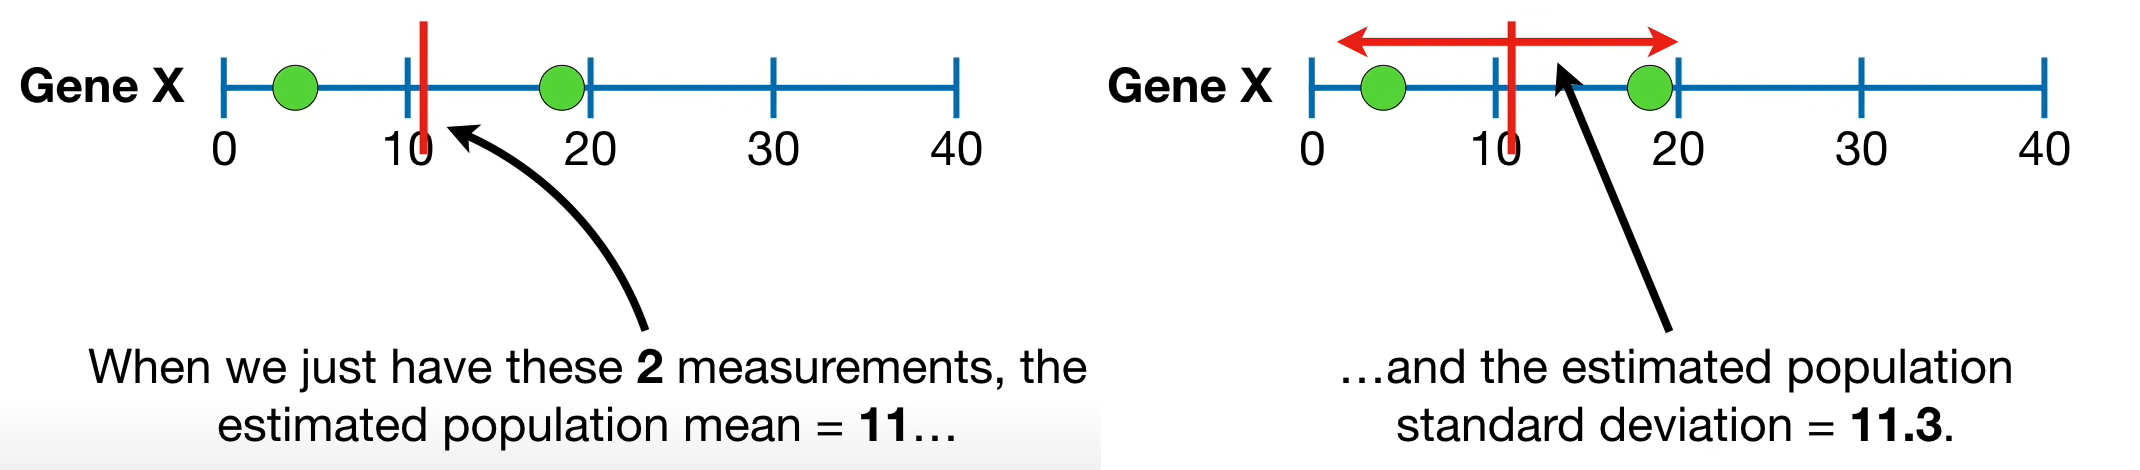

<font color="blue">**Diyelim ki elimizde 3 hücreye ait mRNA sayısı bilgisi var.**</font>

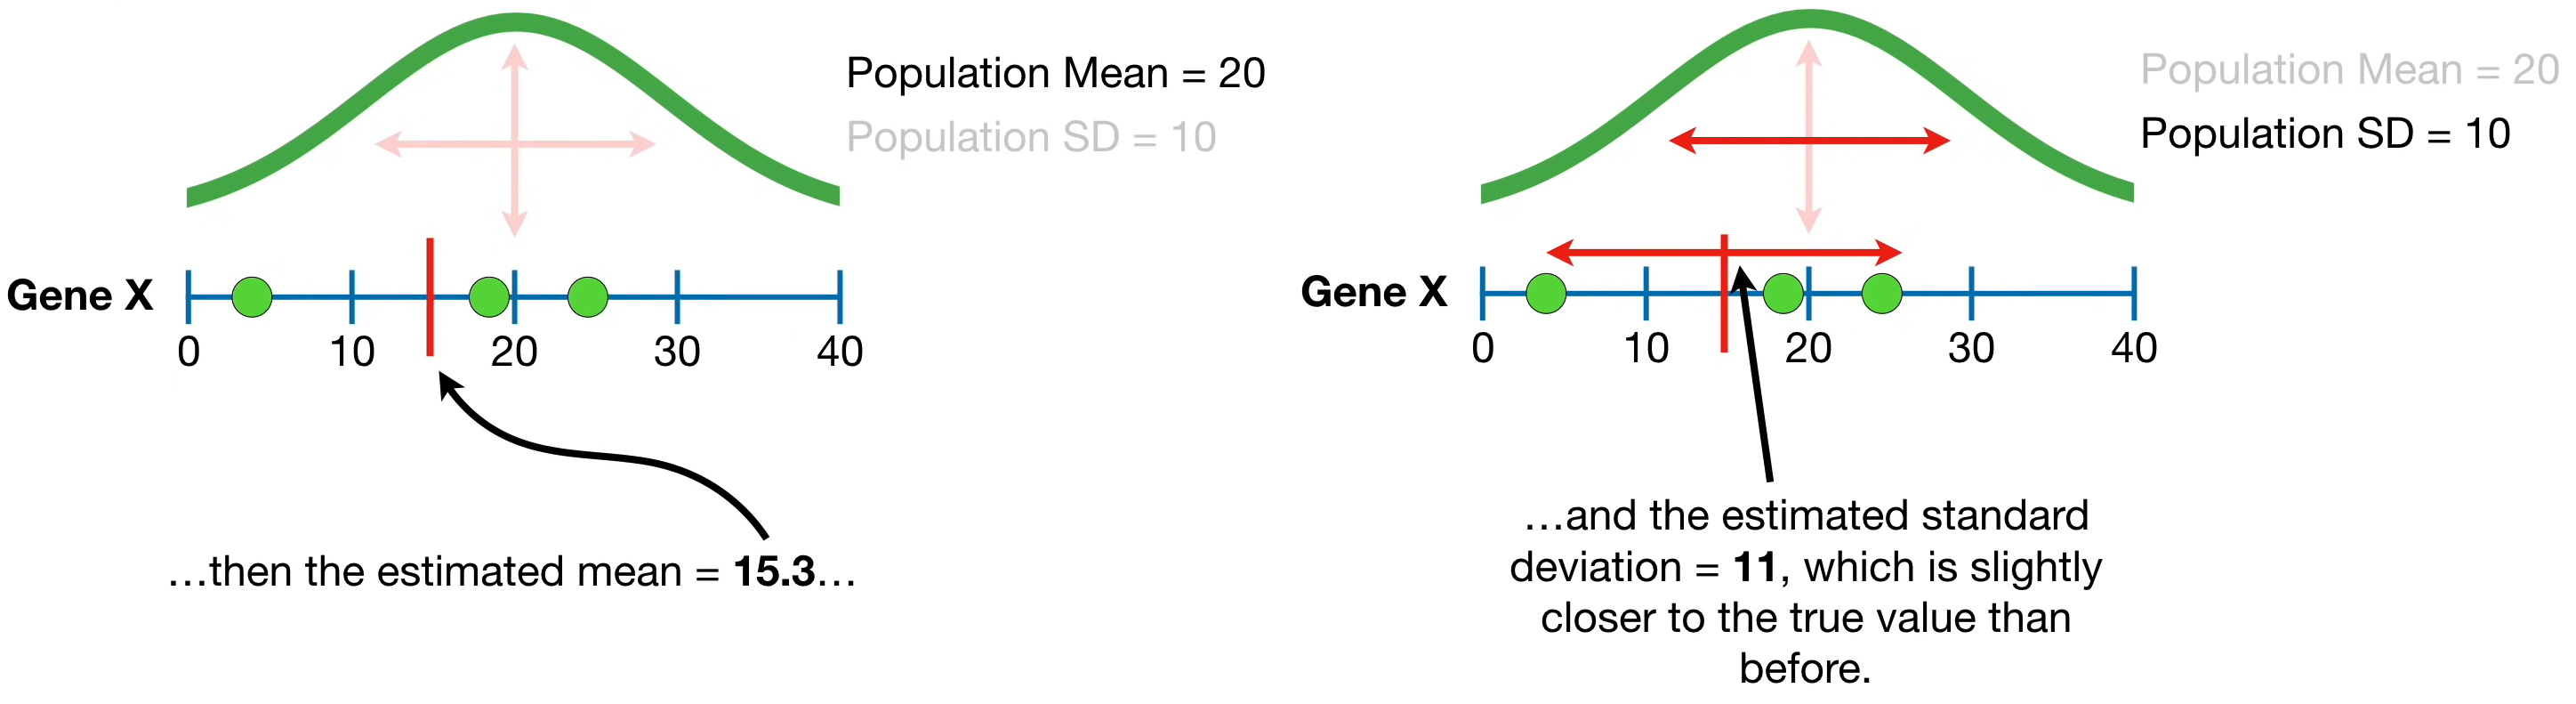

<font color="blue">**Diyelim ki elimizde 5 hücreye ait mRNA sayısı bilgisi var.**</font>

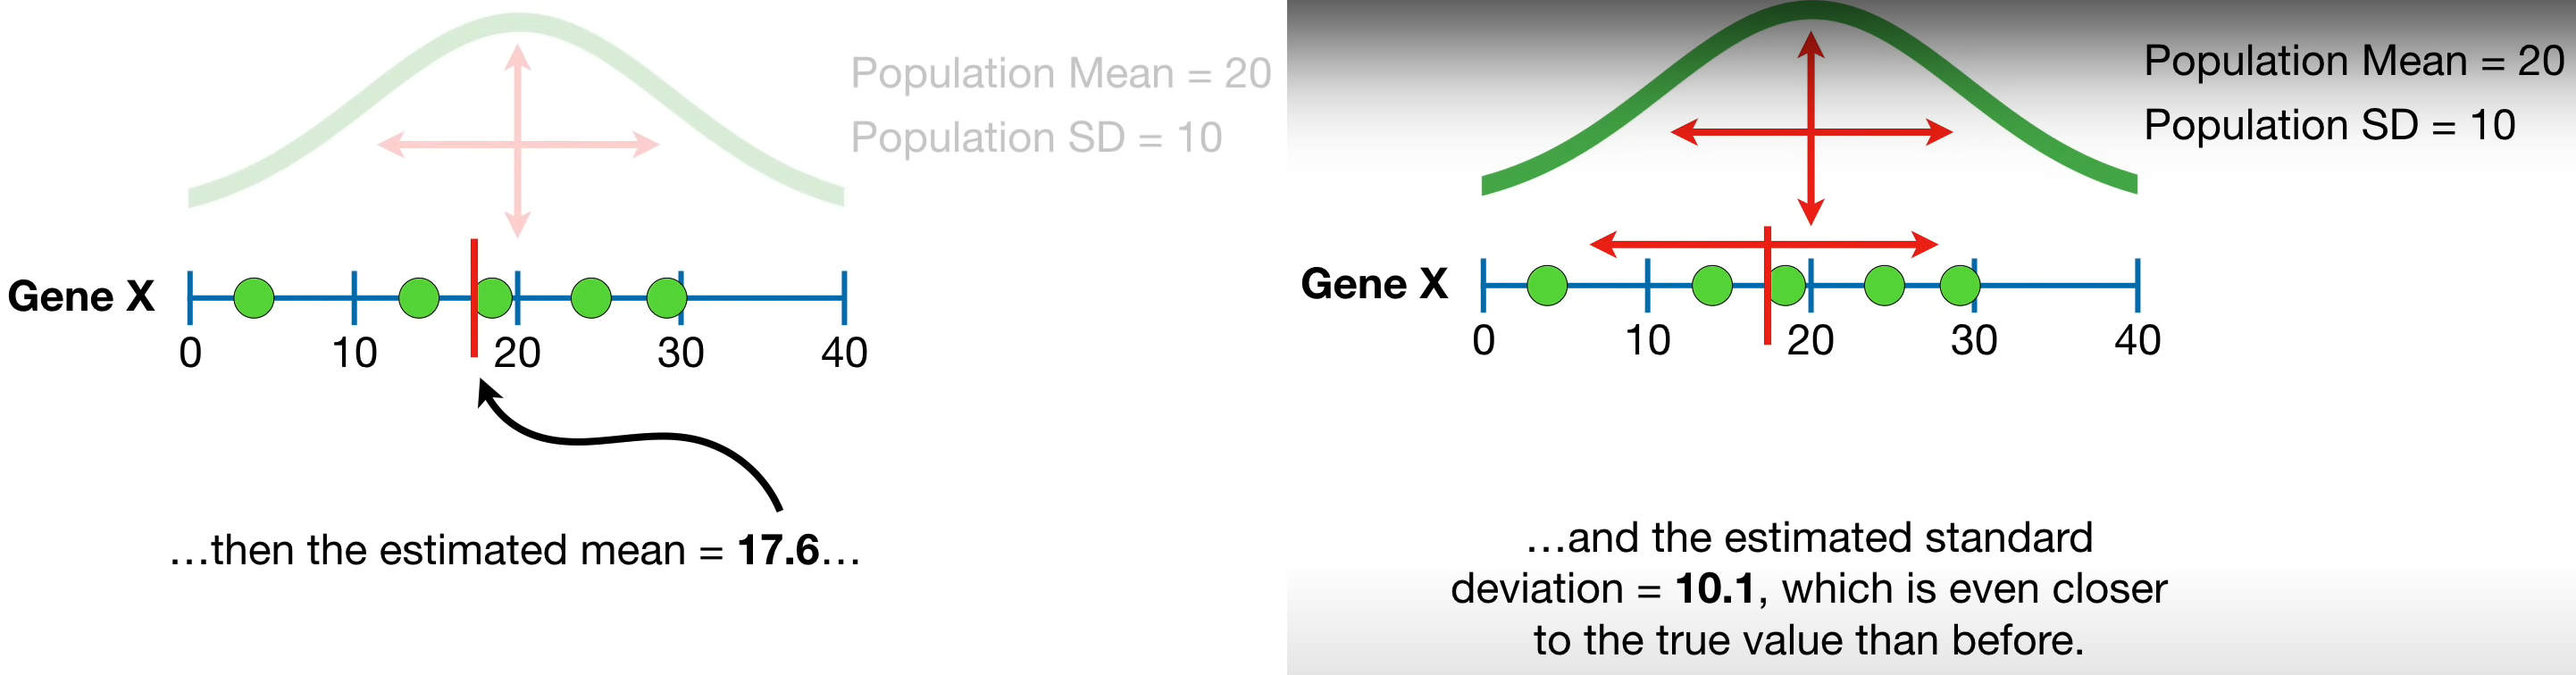

<font color="blue">Gözlem sayımız arttıkça daha güvenilir değerler elde ederiz.</font>

## 2.) Tek bir sample'dan population parametre değerlerini tahmin etmek

#### <font color="purple">Boyu 100 ile 240 cm arasında değişen 500.000 kişinin boy uzunluklarını simule edelim.  </font>

In [70]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123) # to set seed for consistency 
boy_pop = np.random.randint(100,240,size = 500000) # simulated population distribution
boy_pop

array([209, 226, 166, ..., 197, 175, 121])

In [71]:
len(boy_pop)

500000

In [72]:
np.mean(boy_pop)# population mean

169.633012

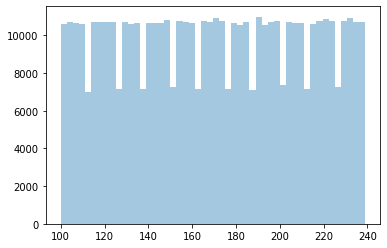

In [74]:
import seaborn as sns
sns.distplot(boy_pop, kde = False);

#### <font color="purple">Populasyondan random sample alalım. </font>

In [147]:
boy_sample = np.random.choice(boy_pop, size = 1000)

<font color="blue">*Buradaki sample'dan kastımız elimizde var olan dataset. Elimizdeki bu küçük örnekten yola çıkarak gerçek hayattaki population parametrelerini (standart sapma, mean) tahmin etmeye çalışıyoruz.*</font>

In [148]:
sample_mean = np.mean(boy_sample)# sample mean
sample_mean

170.943

In [149]:
sample_std = np.std(boy_sample)# sample std
sample_std

40.704615843906446

<font color="blue">Her sample çekişimizde farklı değerler almış ve farklı ortalama ve standart sapma değerleri elde ediyoruz. </font>

<font color="blue">**Değişkenliği nasıl ortadan kaldırabiliriz ve popülasyon parametresine mümkün olduğunca yakın bir şekilde nasıl yaklaşabiliriz?**</font>

## 3.) Bootstrap

### 3.1) Bootstrap Nedir?

<font color="blue">Bootstrap, değiştirme (replacement) ile tekrar tekrar örnekleme (resampling) yaparak, elde edilen örnek dağılımı bir Gauss dağılımı olarak oluşturur ve bu da istatistiksel çıkarımı (örneğin, bir güven aralığı oluşturmayı) mümkün kılar. </font>

#### <font color="purple">REPLACEMENT </font>

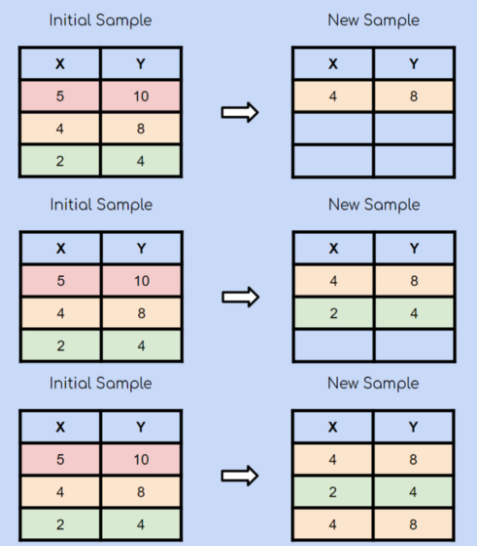

#### <font color="purple">RESAMPLING </font>

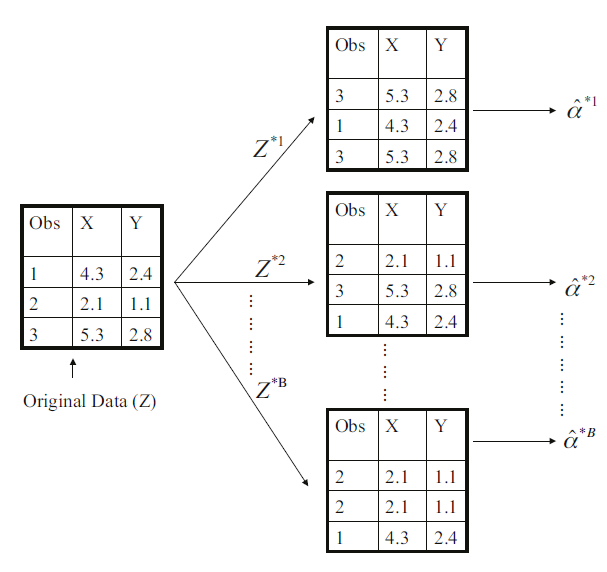

#### <font color="purple">GAUSS DAĞILIMI</font>

Merkezi Limit Teoremi

##### <font color="green">Population datasetimin dağılımını grafik üzerinde gösteriyorum.</font>

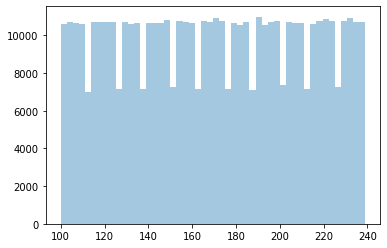

In [78]:
# Boyu 100 ile 240 cm arasında değişen 500.000 kişinin 
# boy uzunluklarını (population datasetini) simule etmiştik.

np.random.seed(123) 
boy_pop = np.random.randint(100,240,size = 500000) # simulated population distribution

# population datasetimizi histogram üzerinde göstermiştik.
sns.distplot(boy_pop, kde = False);

##### <font color="green">Population datasetimden farklı farklı sample'lar alıp her birinin dağılımını grafik üzerinde gösteriyorum. </font>

*Normalde bize tek bir dataset/sample veriliyor.*

<font color="blue">Population data setinde 1000 boyutluk sample'lar çekelim.</font>

In [79]:
boy_sample_1 = np.random.choice(boy_pop, size = 1000)
boy_sample_2 = np.random.choice(boy_pop, size = 1000)
boy_sample_3 = np.random.choice(boy_pop, size = 1000)
boy_sample_4 = np.random.choice(boy_pop, size = 1000)

<font color="blue">Çektiğimiz sample'ların ortalamalarına ve standart sapmalarına bakalım.</font>

In [80]:
boy_sample_1_mean = np.mean(boy_sample_1)
boy_sample_2_mean = np.mean(boy_sample_2)
boy_sample_3_mean = np.mean(boy_sample_3)
boy_sample_4_mean = np.mean(boy_sample_4)

boy_sample_1_std = np.std(boy_sample_1)
boy_sample_2_std = np.std(boy_sample_2)
boy_sample_3_std = np.std(boy_sample_3)
boy_sample_4_std = np.std(boy_sample_4)

print("boy sample1 mean:",boy_sample_1_mean,"-","boy sample1 std:",boy_sample_1_std)
print("boy sample2 mean:",boy_sample_2_mean,"-", "boy sample2 std:",boy_sample_2_std)
print("boy sample3 mean:",boy_sample_3_mean,"-", "boy sample3 std:",boy_sample_3_std)
print("boy sample4 mean:",boy_sample_4_mean,"-", "boy sample4 std:",boy_sample_4_std)

boy sample1 mean: 169.127 - boy sample1 std: 40.466218886869086
boy sample2 mean: 168.517 - boy sample2 std: 40.600883130789164
boy sample3 mean: 168.774 - boy sample3 std: 39.965121343491504
boy sample4 mean: 168.484 - boy sample4 std: 39.875904303225525


<font color="blue">Çektiğimiz sample'ların dağılımlarına bakalım.</font>

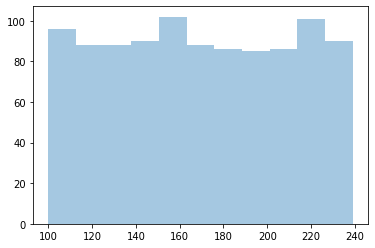

In [81]:
sns.distplot(boy_sample_1, kde = False);

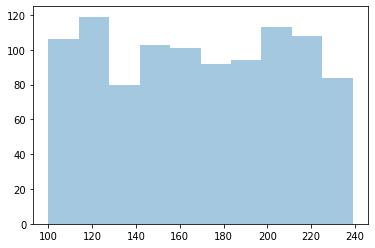

In [82]:
sns.distplot(boy_sample_2, kde = False);

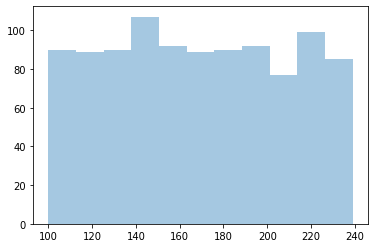

In [83]:
sns.distplot(boy_sample_3, kde = False);

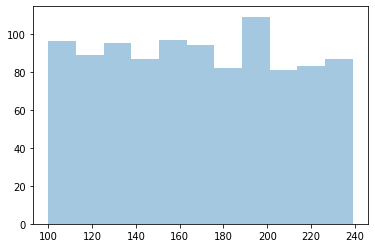

In [84]:
sns.distplot(boy_sample_4, kde = False);

<font color="blue">**Merkezi limit teoremi der ki:** yeterli sayıda sample alırsak bu sample'ların ortalamalarının ortalamaları normal bir dağılım oluşturur.</font>

In [85]:
boy_samples_means = []
for _ in range(10000):
    boy_sample = np.random.choice(boy_pop, size = 1000) 
    boy_mean = np.mean(boy_sample)
    boy_samples_means.append(boy_mean) 
    
boy_samples_means_np = np.array(boy_samples_means) # transform it into a numpy array for calculation

In [86]:
boy_samples_means_np

array([169.889, 167.72 , 168.986, ..., 169.145, 169.956, 172.169])

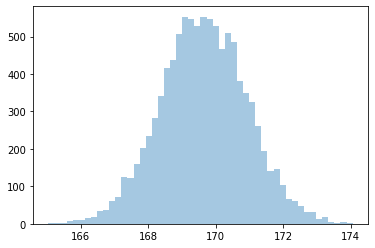

In [87]:
sns.distplot(boy_samples_means_np, kde = False);

In [89]:
np.percentile(boy_samples_means_np, [2.5,97.5])

array([167.16685, 172.15315])

In [90]:
np.mean(boy_pop)

169.633012

<font color="blue">Bu demek oluyor ki populasyondan çok fazla sample çeker ve bunların ortalamalarının bir dağılım oluşturursam bu dağılımın ortalaması populasyonun ortalamasına yaklaşır. Elimizdeki datasetiyle kurduğumuz modellerde amaçladığımız şey gerçek hayattaki duruma en yakın sonuçlar elde etmek. Bunu da ancak elimizdeki datasetini gerçek hayattaki datasetine benzeterek yapabiliyoruz. </font>

### 3.2) Bootstrap Nasıl Uygulanır?

<font color="blue">Bootstrapte de merkezi limit teoreminde yaptığımız **resampling**i (tekrar tekrar sample alma) **replace** ile (aynı gözlemleri tekrar almasına izin vererek) yapıyoruz.</font>

#### <font color="purple">Populasyondan çektiğimiz random sample'dan (yani bize verilen veri setimizden) 10000 kez 1000 boyutunda samplelar alalım.  </font>

*Populasyondan çektiğimiz random sample'ın da (boy_sample) boyutu 1000'di. Yani kendi veri setimizle aynı boyutta alıyoruz bu sample'ları, fakat veri setinin aynısı gelmiyor, çünkü replacement yapıyoruz.*

<font color="blue">Şekle göre 3 gözlemimiz değil de 1.000 gözlemimiz olacak. Bunu B=10.000 kez yapacağız.</font>

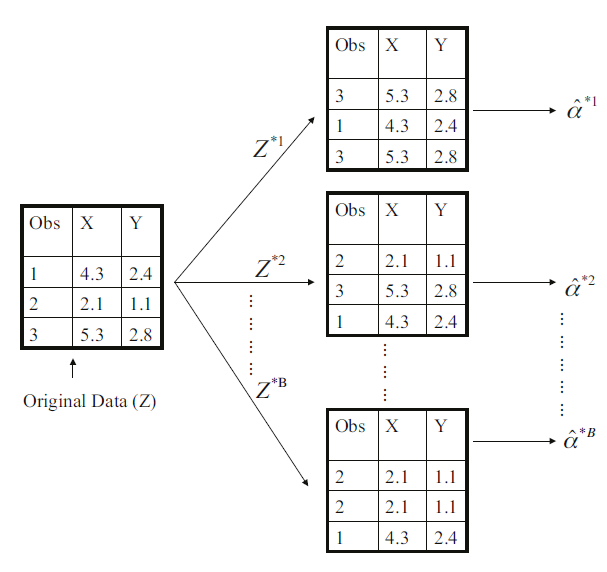

In [91]:
len(boy_sample)

1000

In [95]:
# boy_sample: Populationdan çektiğimiz tek bir sample. Bize verilen veri setimiz gibi düşünebiliriz. 

boot_means = []
for _ in range(10000):
    boot_sample = np.random.choice(boy_sample,replace = True, size = 1000) 
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation

<font color="blue">Bootstraple aldığımız sample'ların ortalamalarının oluşturduğu ölçümlerin standart sapmasına baktığımızda oldukça küçük bir standart hata görüyoruz.</font>

In [98]:
np.std(boot_means_np)

1.2939905216358851

<font color="blue">Halbuki tek bir sample'ın standart sapması bunun 40 katıydı.</font>

In [99]:
np.std(boy_sample)

40.55244060472809

<font color="blue">Standart hatanın küçük olması sayesinde bootstraple aldığımız sample'ların ortalamalarının oluşturduğu dağılım bize populasyonun ortalaması hakkında doğru bir güven aralığı veriyor.</font>

In [100]:
np.percentile(boot_means_np, [2.5,97.5]) # %95 güven aralığı

array([169.580975, 174.72105 ])

In [101]:
np.mean(boy_pop) # true population mean

169.633012

<font color="blue">`[169.580975, 174.72105 ]` şunu ifade ediyor: %95 bizim population meanimiz bu aralıktadır.</font>

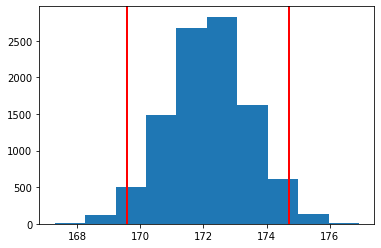

In [102]:
plt.hist(boot_means_np, alpha = 1)
plt.axvline(np.percentile(boot_means_np,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(boot_means_np,97.5),color = 'red',linewidth=2)

## 4.) Scikit-learn'de Bootstrap

<font color="blue">Veri setini yüklüyoruz.</font>

In [103]:
import pandas as pd

ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4]) 
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [108]:
df.shape

(200, 4)

<font color="blue">Modeli oluşturmak ve resampling yapabilmek için gerekli kütüphaneleri yüklüyoruz. </font>

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

model = LinearRegression()

<font color="blue">Data setimizin boyutunda örnekler alarak bootstrapping işlemini gerçekleştiriyoruz. </font>

In [115]:
n_iterations=10000
for i in range(n_iterations):
    
    # Train setini data setinin uzunluğunda sample'lar alarak
    # ve replacement yaparak oluşturuyoruz.
    
    train = resample(df, replace=True, n_samples=len(df))
    
    
    # Test setini trainde almadıklarımı al diyerek oluşturuyoruz.    
    test = df[~df.index.isin(train.index)]


In [113]:
n_iterations=3
for i in range(n_iterations):
    
    # Train setini data setinin uzunluğunda sample'lar alarak
    # replacement da yaparak oluşturuyoruz.
    
    train = resample(df, replace=True, n_samples=len(df))
    print(train.shape)
    
    # Test setini trainde almadıklarımı al diyerek oluşturuyoruz.    
    test = df[~df.index.isin(train.index)]
    print(test.shape)

(200, 4)
(75, 4)
(200, 4)
(71, 4)
(200, 4)
(82, 4)


In [116]:
df.shape

(200, 4)

<font color="blue">Boş bir dataframe oluşturuyoruz her bir iterasyondaki istatistikleri bu dataframe'e kaydedeceğiz.</font>

In [122]:
bootstrapped_stats = pd.DataFrame()

In [123]:
n_iterations=10000
for i in range(n_iterations):
    
    # Train setini data setinin uzunluğunda sample'lar alarak
    # replacement da yaparak oluşturuyoruz.
    
    train = resample(df, replace=True, n_samples=len(df))
    
    
    # Test setini trainde almadıklarımı al diyerek oluşturuyoruz.    
    test = df[~df.index.isin(train.index)]

    # Train ve testi X ve y olarak ayırıyoruz.
    X_train = train.loc[:,["TV", "radio","newspaper"]]
    y_train = train.loc[:, ["sales"]]

    X_test = test.loc[:,["TV", "radio","newspaper"]]
    y_test = test.loc[:, ["sales"]]

    # Linear regresyon modelini fit ediyoruz.
    model.fit(X_train, y_train)

    # İstatistikleri bir dataframe'de saklıyoruz.
    intercept = model.intercept_
    TV_katsayısı = model.coef_.ravel()[0]
    radio_katsayısı = model.coef_.ravel()[1]
    newspaper_katsayısı = model.coef_.ravel()[2]
    
    # R^2 hesaplıyoruz.
    r_squared = model.score(X_test, y_test)

    bootstrapped_stats_i = pd.DataFrame(data=dict(
        intercept=intercept,
        TV_katsayısı=TV_katsayısı,
        radio_katsayısı=radio_katsayısı,
        newspaper_katsayısı=newspaper_katsayısı,
        r_squared=r_squared
    ))

    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats,
                                         bootstrapped_stats_i])

In [124]:
 bootstrapped_stats 

,intercept,TV_katsayısı,radio_katsayısı,newspaper_katsayısı,r_squared
0,3.082477,0.045172,0.186566,0.002261,0.868320
0,3.063324,0.046155,0.185451,-0.003324,0.898293
0,2.590957,0.049390,0.172255,0.002603,0.902152
0,2.810820,0.045099,0.196279,0.000353,0.913374
0,2.506096,0.049875,0.179260,0.000193,0.873337
...,...,...,...,...,...
0,2.882789,0.045742,0.184443,0.006674,0.881027
0,3.008998,0.043908,0.196251,0.001516,0.879884
0,3.781907,0.044536,0.182559,-0.019660,0.862941
0,2.985835,0.045765,0.190306,-0.003516,0.917062


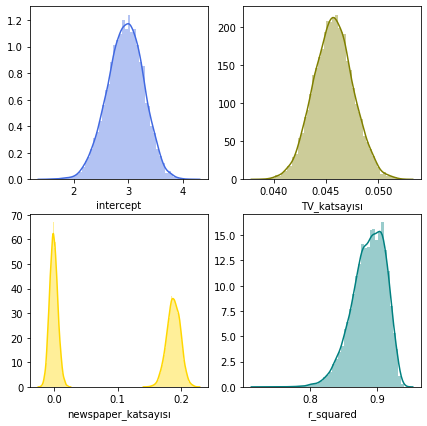

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms
fig, axes = plt.subplots(2, 2, figsize=(7, 7));
sns.distplot(bootstrapped_stats["intercept"], color="royalblue", ax=axes[0, 0], kde=True);
sns.distplot(bootstrapped_stats["TV_katsayısı"], color="olive", ax=axes[0, 1], kde=True);
sns.distplot(bootstrapped_stats["radio_katsayısı"], color="gold", ax=axes[1, 0], kde=True);
sns.distplot(bootstrapped_stats["newspaper_katsayısı"], color="gold", ax=axes[1, 0], kde=True);
sns.distplot(bootstrapped_stats["r_squared"], color="teal", ax=axes[1, 1], kde=True);

In [137]:
np.mean(r_squared)

0.8793365838832977